In [50]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Problem 1

### First we generate paths of 10000 stocks over 1000 periods

In [2]:
# define num of periods and num of stocks
periods = 1000
num_stocks = 10000

# a function to generate one stock path
def gen_one_path():
    p = [1]
    for i in range(1,periods):
        p.append((1+0.007*np.random.normal(0,1))*p[i-1])
    return np.array(p)

In [3]:
# store all paths into a list
paths = []
for i in range(num_stocks):
    paths.append(gen_one_path())

Here we can plot 50 sample paths:

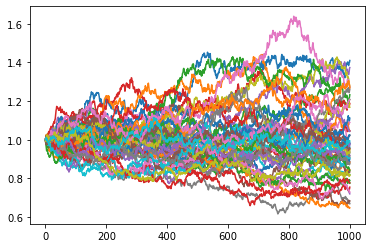

In [20]:
for i in range(50):
    plt.plot(paths[i])

From the previous figure we can find that our stocks follow the specified random walks.

### Then we apply our selecting rule to generate Russell 1000 index

In [4]:
def update_index(start,end):
    """return the index from start time to end time
    
    start: the update time
    end: the next update time
    """
    index = np.repeat(0.0,end-start)
    path = []
    for i in paths:
        path.append(i[start])
    tops = np.argsort(path)[-1000:]
    for i in tops:
        index+=paths[i][start:end]
    return index/1000

In [5]:
# select stocks into Russell 1000 index
update_time = np.arange(1,1000,50)
update_time = np.append(update_time,1000)
index = np.array([])
index_mean = np.array([])
for i in range(1,len(update_time)):
    new_index = update_index(update_time[i-1],update_time[i])
    index=np.append(index, new_index)
index = np.append(1,index)

windows = np.arange(0,1001,100)
for i in range(1,len(windows)):
    mean = index[windows[i-1]:windows[i]].mean()
    index_mean = np.append(index_mean, mean)

## Q1: Plot simulated Russell 1000 Index

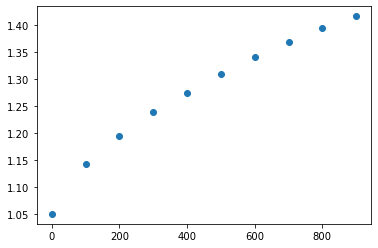

In [6]:
plt.scatter(np.arange(0,1000,100),index_mean)

It seems reasonable because we select 1000 stocks with laregest market cap every 50 periods.

### After we have the path of Russell 1000 index, we can claculate the average return of index in each window

In [42]:
windows[-1]=999
re1 = np.array([])
for i in range(1,len(windows)):
    returns = np.log(index[windows[i]]) - np.log(index[windows[i-1]])
    re1 = np.append(re1,returns/100)

## Q2: Plot the average return of Russell 1000 Index

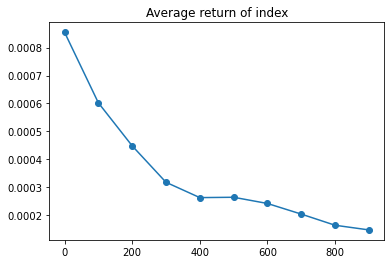

In [43]:
plt.title("Average return of index")
plt.scatter(np.arange(0,1000,100),re1)
plt.plot(np.arange(0,1000,100),re1)
plt.show()

### Then we calculate the average return of 10000 stocks in each window

In [44]:
re2 = np.array([])
for i in range(1,len(windows)):
    returns = 0
    for j in paths:
        returns += np.log(j[i]) - np.log(j[i-1])
    re2 = np.append(re2,returns/100/len(paths))

## Q3: Plot the average return of the 10,000 stocks

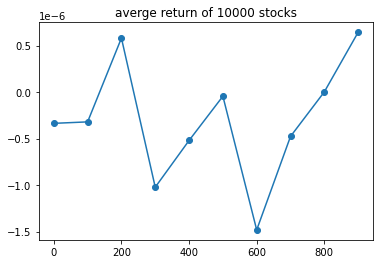

In [45]:
plt.title("averge return of 10000 stocks")
plt.scatter(np.arange(0,1000,100),re2)
plt.plot(np.arange(0,1000,100),re2)
plt.show()

## Q4:

From the previous figure we can find that obviously the average return of Russell 1000 index is larger than the average return of 10000 stocks. Because in one window, we will always re-select the stocks that have the largest market cap, which makes the return of Russell 1000 index go up. It cannot represent the general performance of 10000 stocks.

# Problem 2

### Download data (11 ETFs and SPY)

In [46]:
import yfinance as yf
symbols = ['VOX','VCR', 'VDC', 'VDE', 'VFH', 'VHT', 'VIS', 'VGT', 'VAW', 'VNQ', 'VPU', 'SPY']
secs = ['COMM', 'CONSUMER DISC', 'CONSUMER ST', 'ENERGY', 'FINANCIALS', 'HEALTH', 'INDUSTRIALS', 
           'TECHNOLOGY', 'MATIREALS', 'REAL ESTATE', 'UTILITIES']
start = '2010-1-1'
end = '2020-12-31'
data = yf.download(symbols,start,end)['Adj Close'] 

[*********************100%***********************]  12 of 12 completed


### Calculate log return

In [12]:
returns = np.log(data/data.shift(1))
returns = returns.dropna()

## Q1: Plot the return processes of the 11 selected sector ETFs and the S&P 500 index.

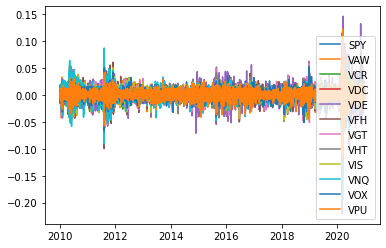

In [13]:
for col in returns.columns:
    plt.plot(returns[col], label = col)
plt.legend()
plt.show()

Then we create a dataframe consisting of the return of 11 etfs so as to do factor analysis

In [14]:
df = returns.loc[:,['VOX','VCR', 'VDC', 'VDE', 'VFH', 'VHT', 'VIS', 'VGT', 'VAW', 'VNQ', 'VPU']]
df = df*100
df

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
Date,,,,,,,,,,,
2010-01-05,0.673425,0.634390,0.090341,1.018405,1.109816,-0.620802,0.436826,-0.107591,0.599336,-0.112327,-0.936127
2010-01-06,-1.595884,0.105346,-0.015073,1.144792,0.167090,0.566163,0.246038,-0.702141,1.398573,-0.179897,0.446151
2010-01-07,-0.367900,0.859618,0.000000,-0.239290,1.918021,0.345434,1.221250,-0.380143,-0.435813,1.074803,-0.446151
2010-01-08,-0.457324,0.083480,-0.543533,0.750283,-0.393823,0.362312,1.317165,0.776825,1.079105,-0.737704,-0.107970
2010-01-11,0.088101,-0.125219,0.347609,-0.079309,-0.032884,0.505069,0.935499,-0.432809,-0.335080,0.581652,0.768787
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.677205,0.084619,0.414927,2.502538,1.632238,0.130811,0.568646,-0.914369,0.278358,-0.648850,-0.172607
2020-12-24,0.067481,0.194736,0.424830,-0.840017,0.041858,0.139639,0.064970,0.662475,0.535129,0.871695,0.599084
2020-12-28,1.240058,0.796987,0.648302,-0.731199,0.375961,-0.297528,-0.053144,0.700324,-0.405921,0.594320,0.565810


In [15]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

### Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 

In [33]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value,p_value

(37302.50673827459, 0.0)

The p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

### Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 

In [34]:
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.9471105112310753

The overall KMO for our data is 0.94, which is excellent.

### Create factor analysis object and perform factor analysis

In [17]:
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df)
ev, v = fa.get_eigenvalues()
ev # eigenvalues

array([8.30203909, 0.76746841, 0.51278489, 0.29349483, 0.27766644,
       0.20109787, 0.19270124, 0.15890452, 0.13121253, 0.09761212,
       0.06501806])

### Scree plot

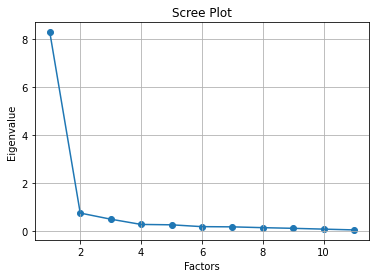

In [18]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Q2: use the varimax method to find a final rotated factor solution, which is the loadings

- From the scree plot, we may choose 2 or 3 or 4 factors in our model, we first choose a 4 factor model

In [47]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(df)
loadings = pd.DataFrame(fa.loadings_)
loadings.index = df.columns
loadings.columns = ['factor1','factor2','factor3','factor4']

# highlight the factors which are larger than .5
def style_highlight(v, props=''):
    return props if v > 0.5 else None
loadings = loadings.style.applymap(style_highlight, props='color:red;')
loadings

,factor1,factor2,factor3,factor4
VOX,0.412125,0.609747,0.378642,0.194087
VCR,0.490578,0.727371,0.276853,0.263939
VDC,0.324254,0.471882,0.719590,0.114408
VDE,0.734165,0.313966,0.251493,0.157425
VFH,0.674850,0.455871,0.333720,0.280675
VHT,0.413111,0.623482,0.425570,0.145798
VIS,0.702967,0.524178,0.342481,0.217563
VGT,0.414551,0.772129,0.283419,0.169176
VAW,0.730293,0.470085,0.320010,0.189978
VNQ,0.366099,0.309026,0.529838,0.696973


We can find that factor4 only have one high factor loading, so we consider a model that has only 3 factors

In [48]:
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(df)
loadings = pd.DataFrame(fa.loadings_)
loadings.index = df.columns
loadings.columns = ['factor1','factor2','factor3']

# highlight the factors which are larger than .5
def style_highlight(v, props=''):
    return props if v > 0.5 else None
loadings = loadings.style.applymap(style_highlight, props='color:red;')
loadings

,factor1,factor2,factor3
VOX,0.430696,0.630878,0.377012
VCR,0.533540,0.721581,0.307877
VDC,0.338700,0.523341,0.619938
VDE,0.733143,0.322854,0.264948
VFH,0.712129,0.461881,0.371072
VHT,0.420972,0.653188,0.395734
VIS,0.725269,0.532538,0.353891
VGT,0.436141,0.777650,0.277625
VAW,0.742542,0.479960,0.326680
VNQ,0.462902,0.380790,0.612241


Now every factor has 3 or more high factor loadings, so I decide to choose a 3 factor model in this problem

### Regression and prediction

The model is

$$
    r_t = \mathbf{\beta}f_t + \epsilon_t
$$

In [27]:
from statsmodels.api import OLS, add_constant

In [28]:
factors = []
for period in returns.index:
    factor = OLS(endog=df.loc[period, loadings.index], exog=loadings).fit()
    factors.append(factor.params)

In [29]:
factors = pd.DataFrame(factors, index=returns.index, columns=loadings.columns.tolist())
factors.head()

,factor1,factor2,factor3
Date,,,
2010-01-05,1.934897,-0.410907,-1.260639
2010-01-06,2.175424,-2.078036,0.184660
2010-01-07,1.218924,-0.392201,-0.212443
2010-01-08,1.343929,-0.043200,-1.120464
2010-01-11,-0.067179,-0.469374,1.114532


In [30]:
f = np.matrix(factors)
beta = np.matrix(loadings)
pred = beta.dot(f.transpose())
pred = pred.mean(axis=0)
pred = np.array(pred)

In [31]:
pred = pd.Series(pred.flatten())
pred.index = factors.index

In [32]:
spy = data['SPY']
spy_return = np.log(spy/spy.shift(1))*100
spy_return = spy_return.dropna()

### return of the factor model

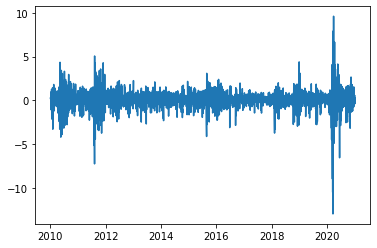

In [40]:
plt.plot(pred)
plt.show()

### Return of S&P500 index

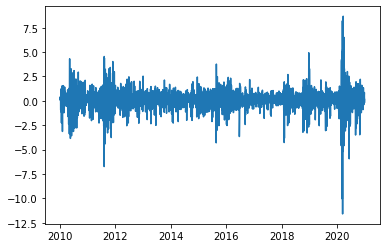

In [41]:
plt.plot(spy_return)
plt.show()

### Comparison between S&P500 and factor model

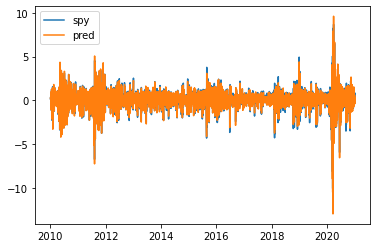

In [35]:
plt.plot(spy_return,label='spy')
plt.plot(pred,label='pred')
plt.legend()
plt.show()

From the figure we can find that our factor model can simulate the return of S&P 500 index

## Q3: Apply the factor sorting method

### We now choose the facotr1 which is the most important factor and then we sort them:

In [37]:
factor_sort = loadings.loc[:,'factor1']
factor_sort.index = secs

### Normalization

In [38]:
factor_sort = (factor_sort - factor_sort.mean())/factor_sort.std()

In [39]:
factor_sort = factor_sort.sort_values()
factor_sort

UTILITIES       -1.612749
CONSUMER ST     -1.052370
HEALTH          -0.587749
COMM            -0.532834
TECHNOLOGY      -0.502081
REAL ESTATE     -0.350954
CONSUMER DISC    0.047968
FINANCIALS       1.056534
INDUSTRIALS      1.130742
ENERGY           1.175208
MATIREALS        1.228286
Name: factor1, dtype: float64

From the table above, we short the **UTILITIES, CONSUMER ST, HEALTH** sectors and long **INDUSTRIALS, MATIREALS, ENERGY** sectors